In [2]:
import yfinance as yf
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score
from datetime import datetime, timedelta
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [5]:
df_credit = pd.read_csv(r'C:\Users\admin\OneDrive\Document\11. Research project\application_train.csv')

In [6]:
df_credit.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
cat_var = df_credit.select_dtypes(exclude=['number']).columns.tolist()

In [8]:
print(cat_var)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [9]:
label_encoder = LabelEncoder()
for i in cat_var:
    df_credit[i] = label_encoder.fit_transform(df_credit[i])

In [10]:
df_credit.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


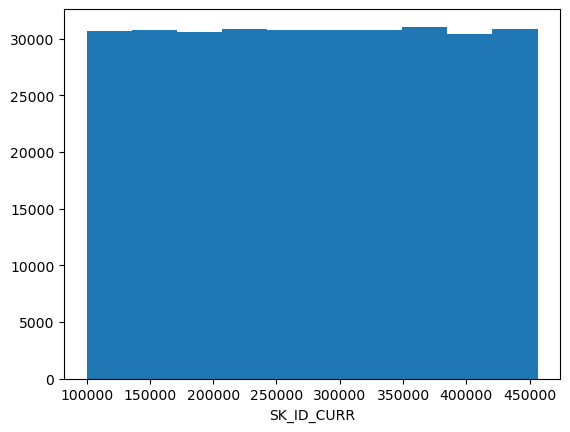

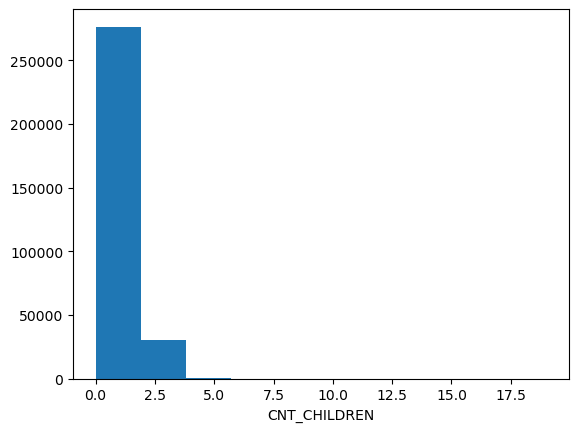

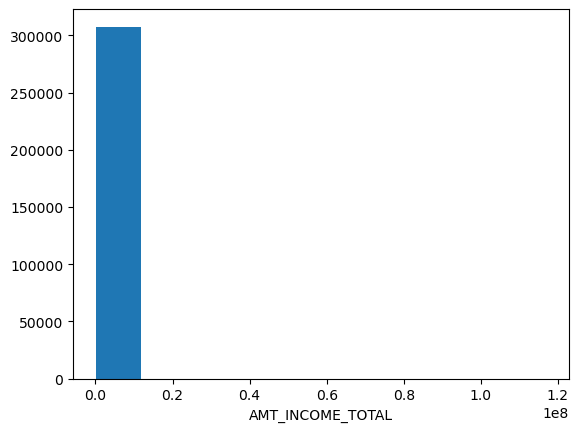

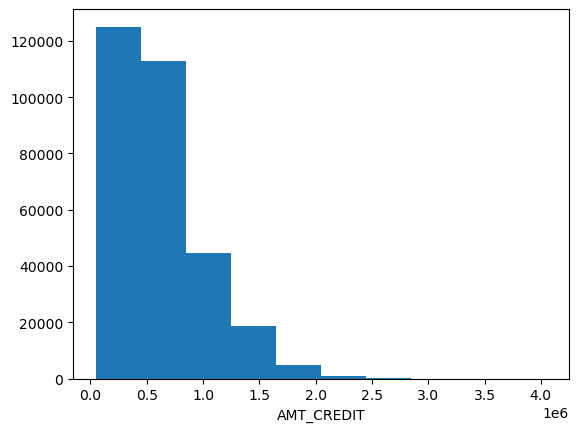

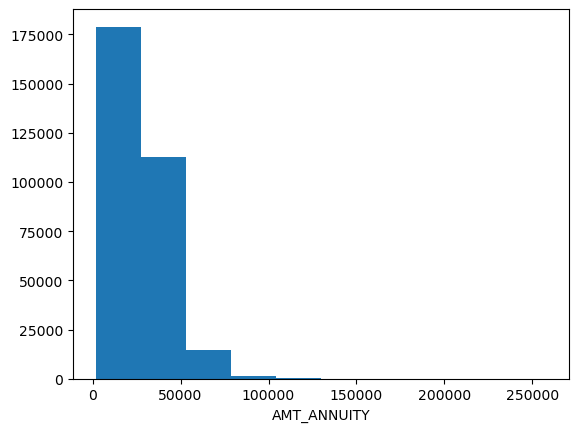

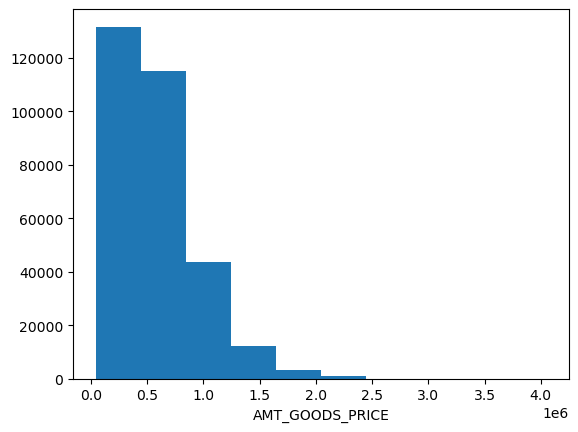

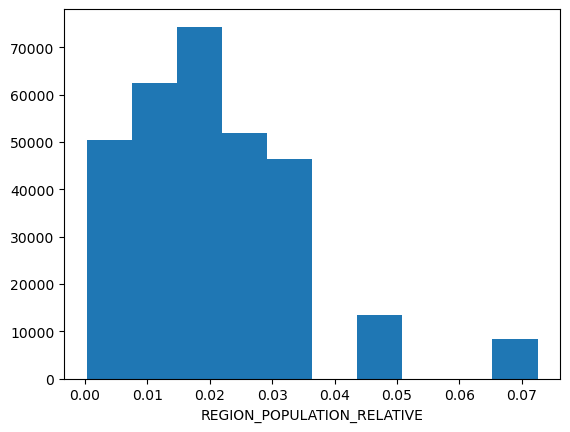

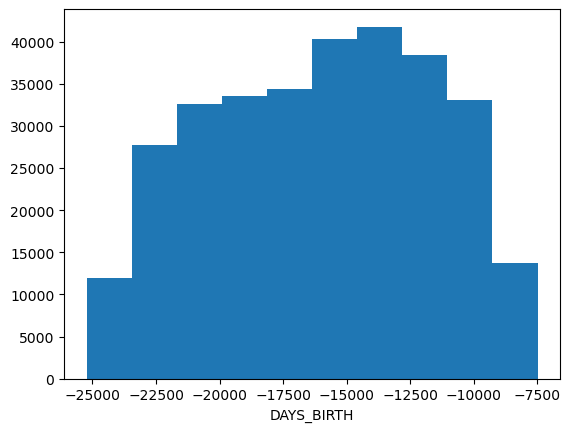

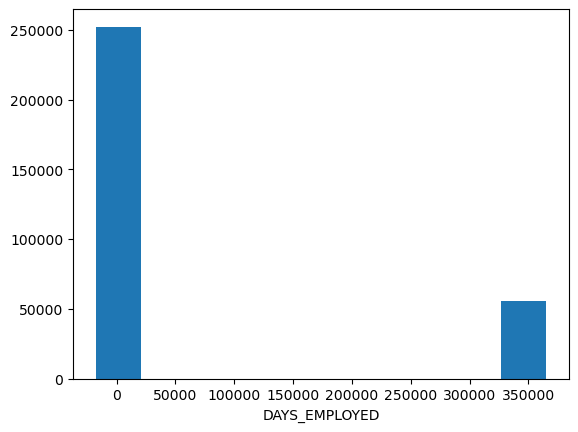

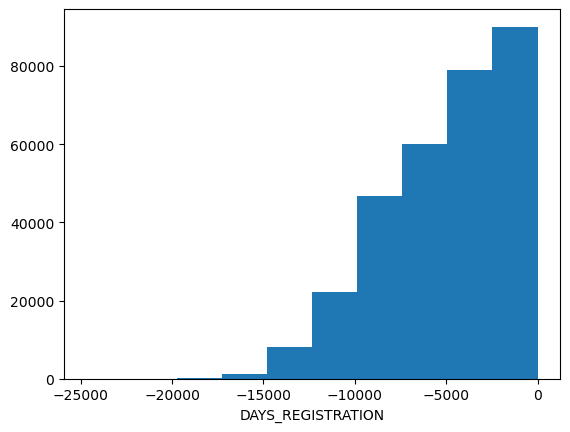

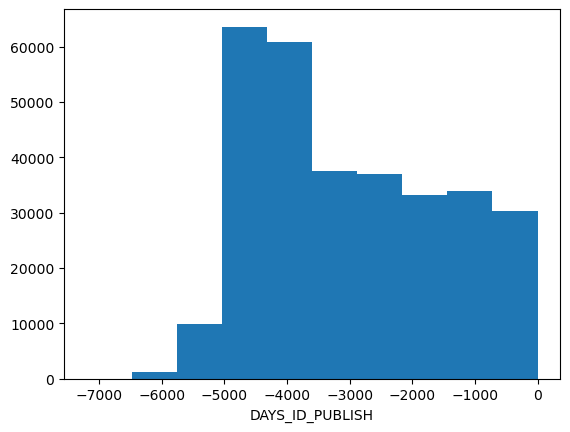

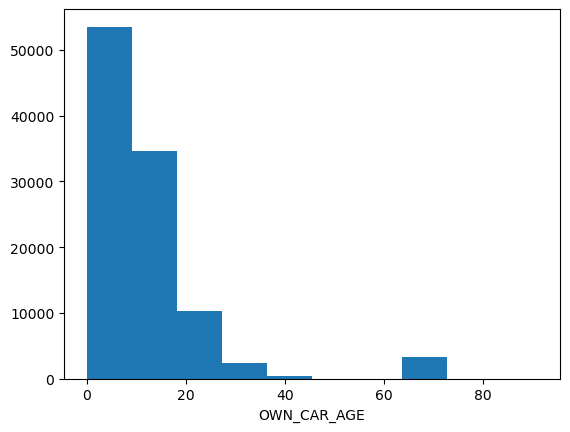

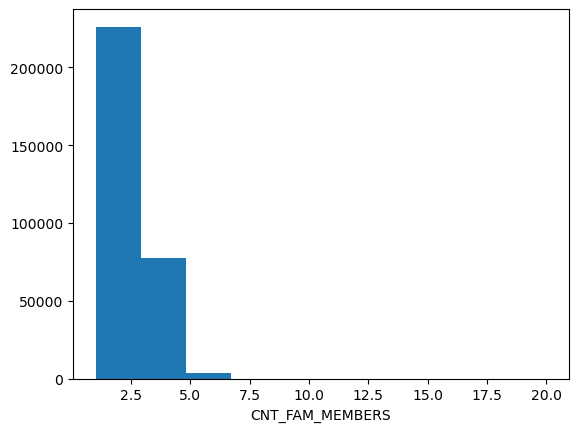

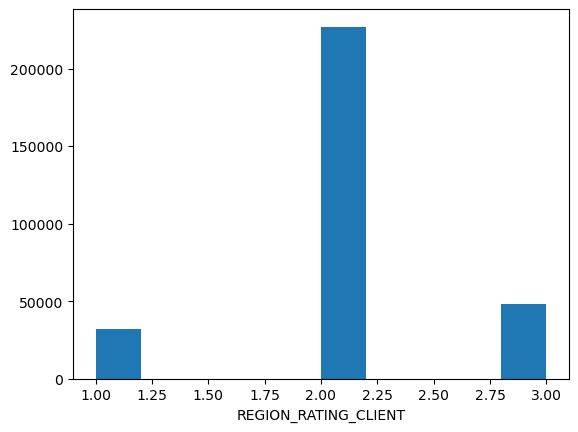

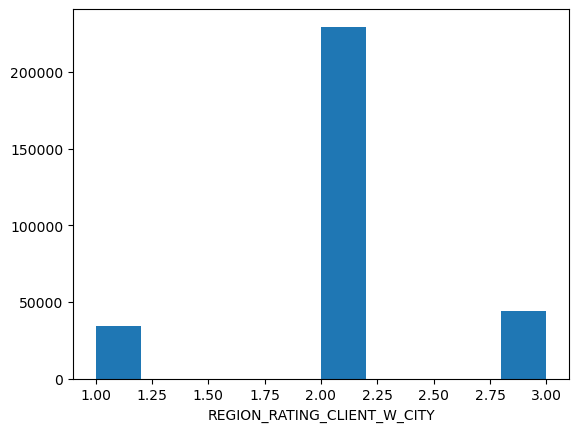

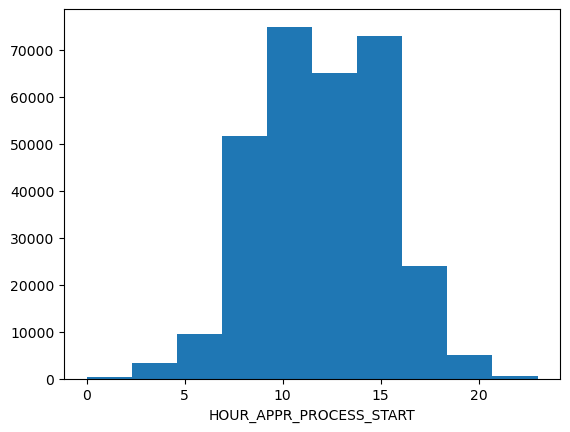

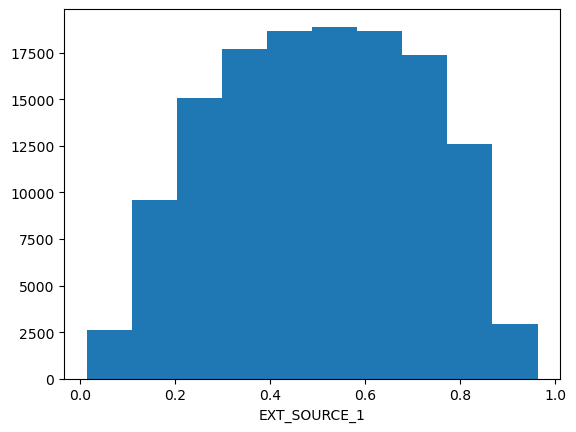

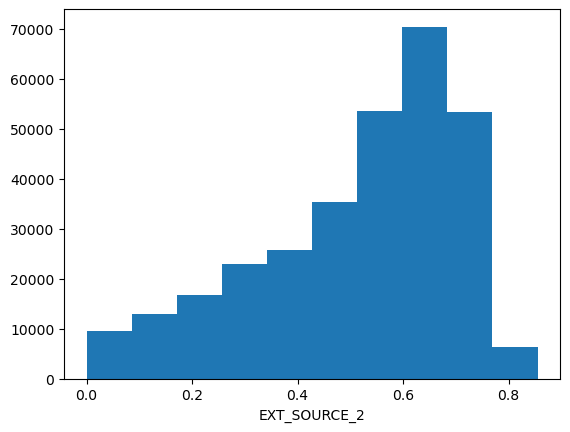

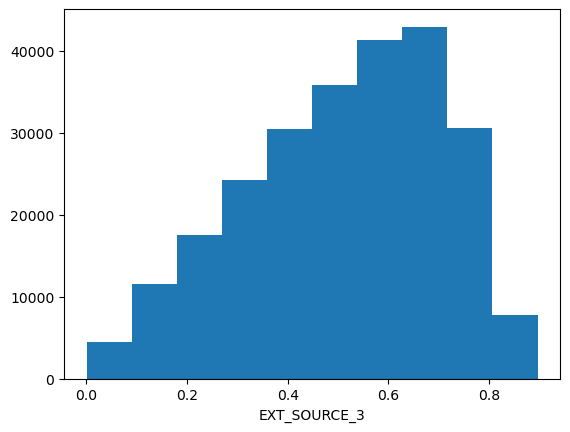

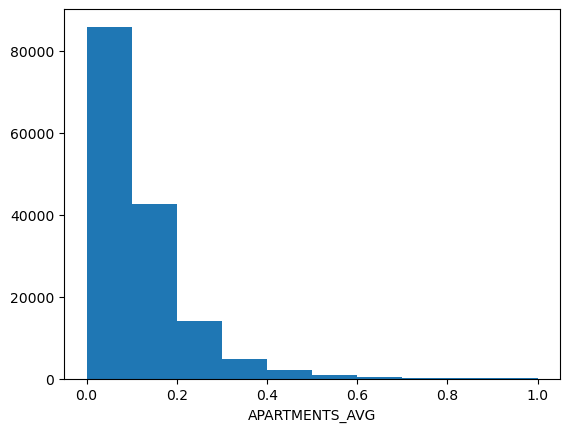

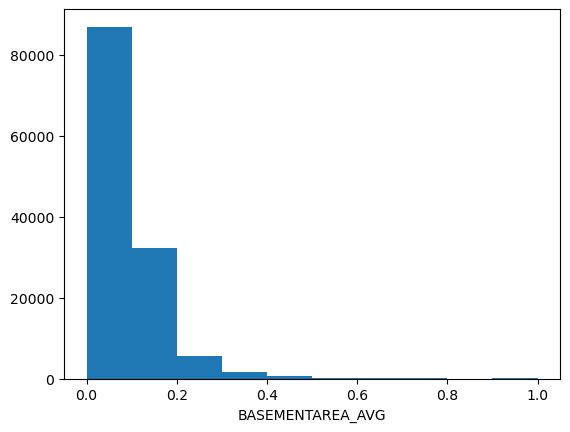

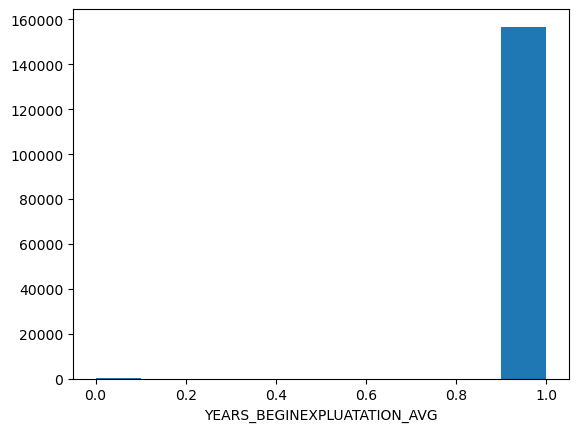

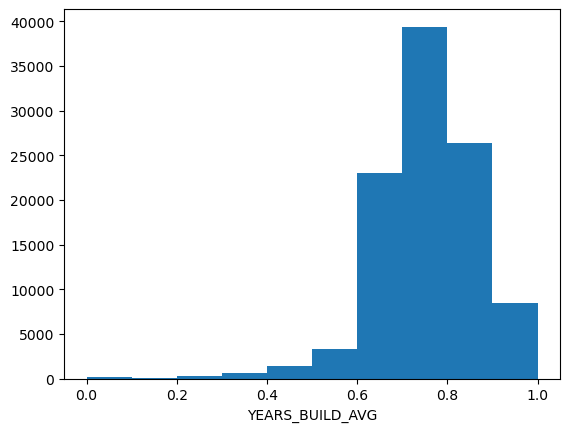

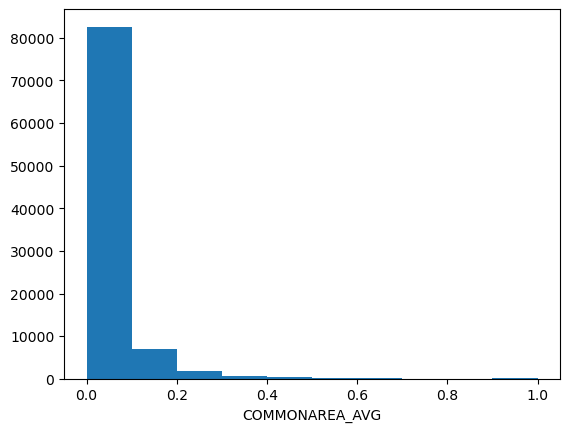

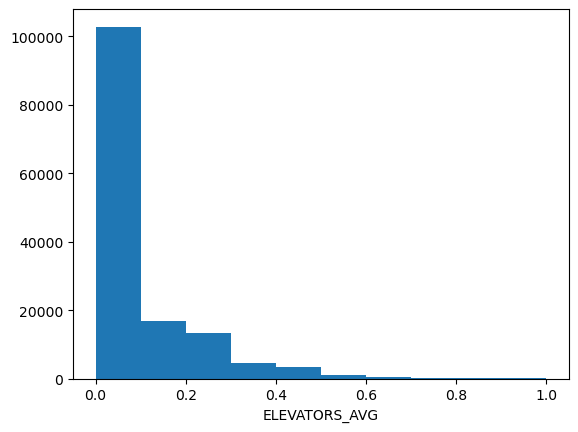

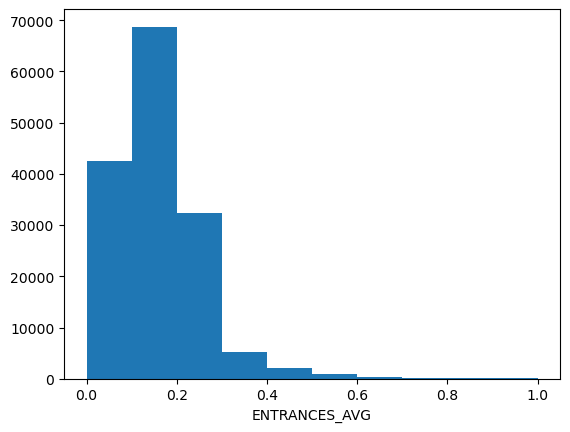

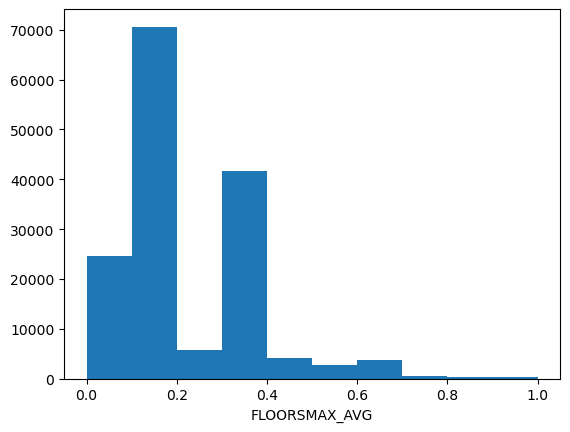

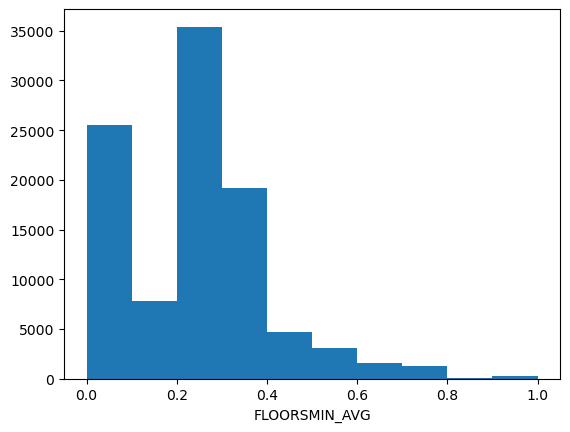

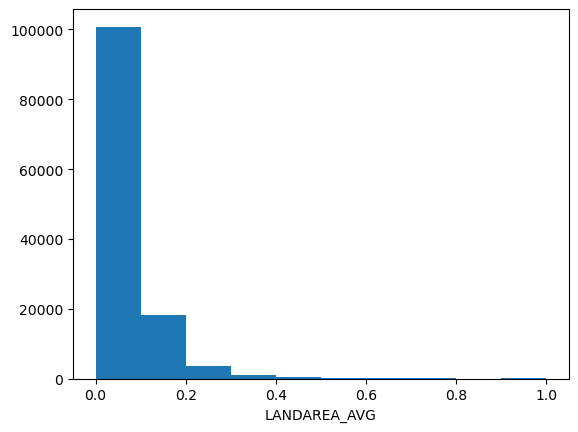

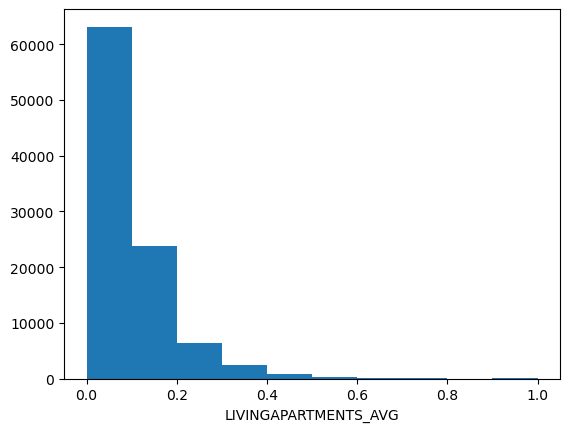

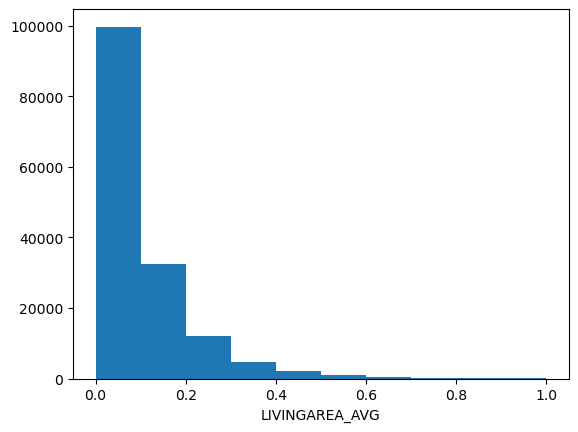

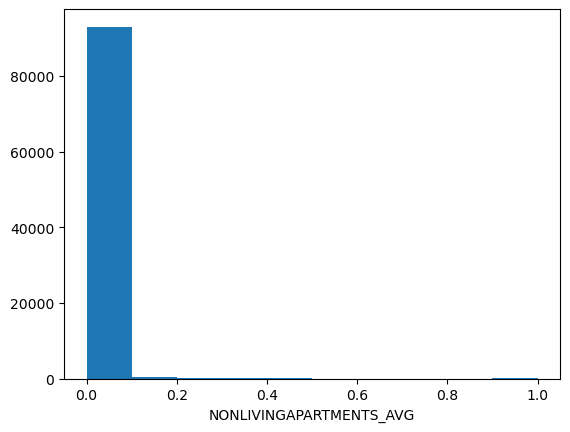

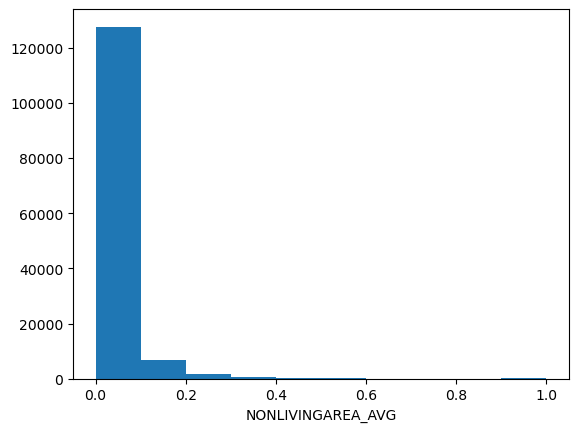

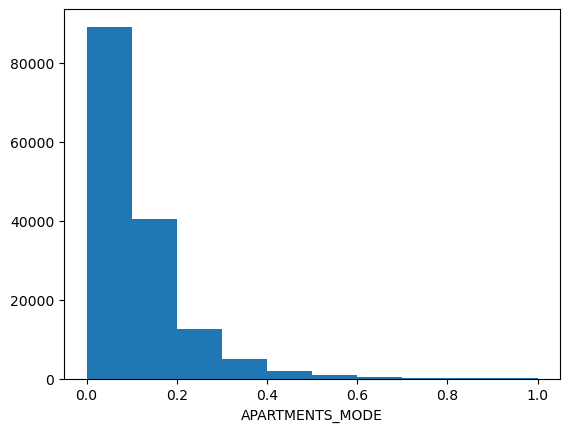

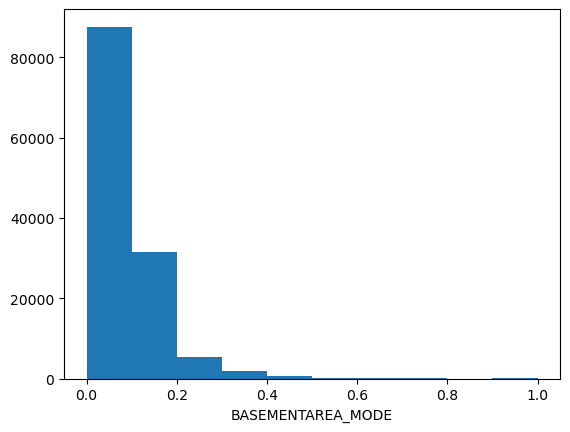

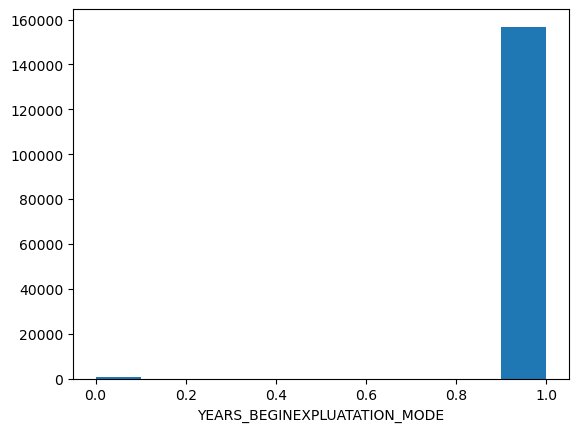

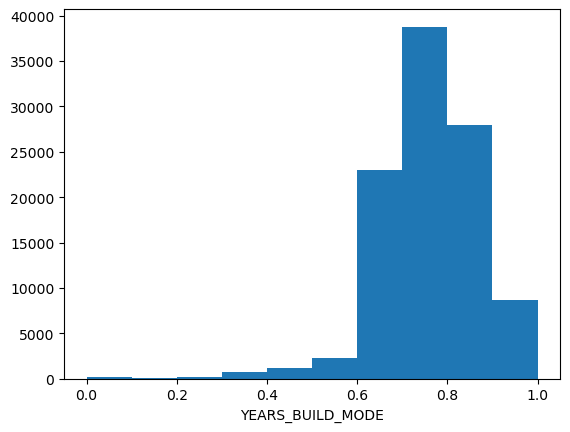

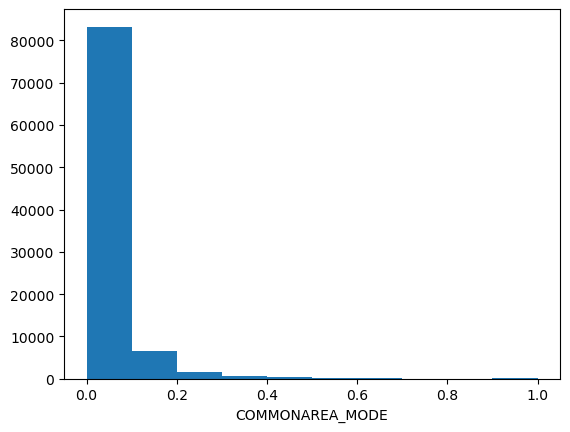

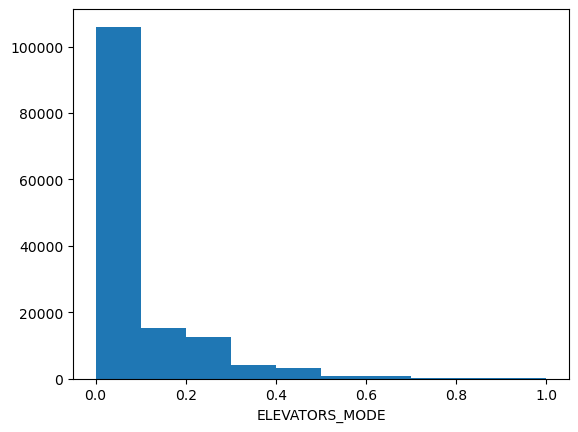

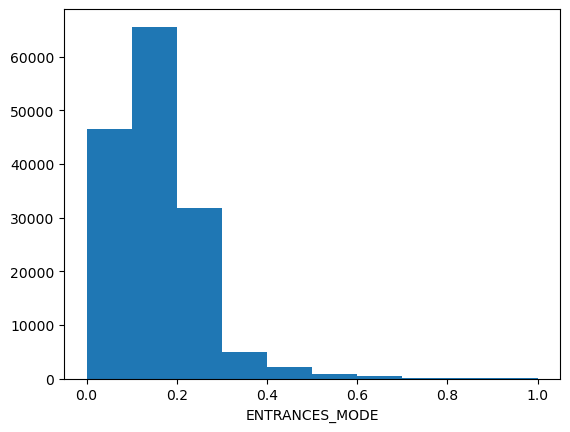

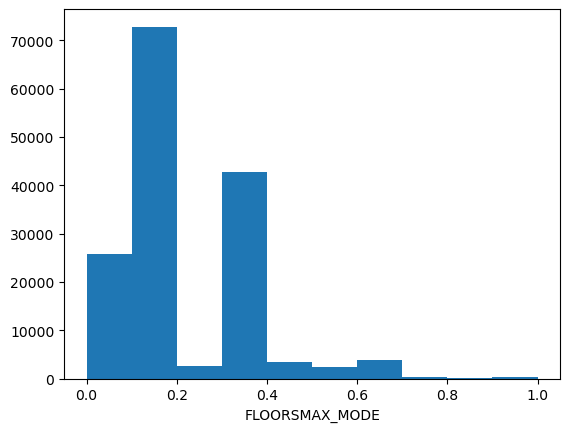

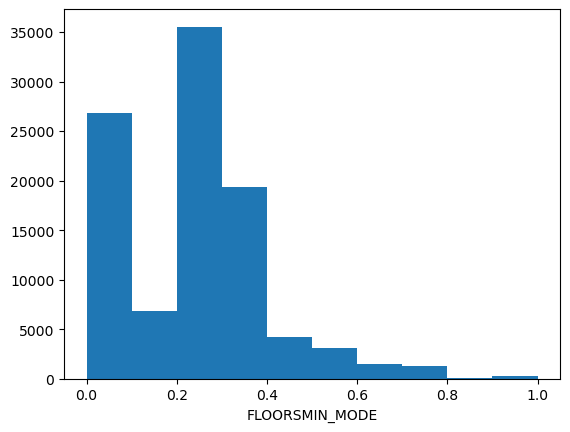

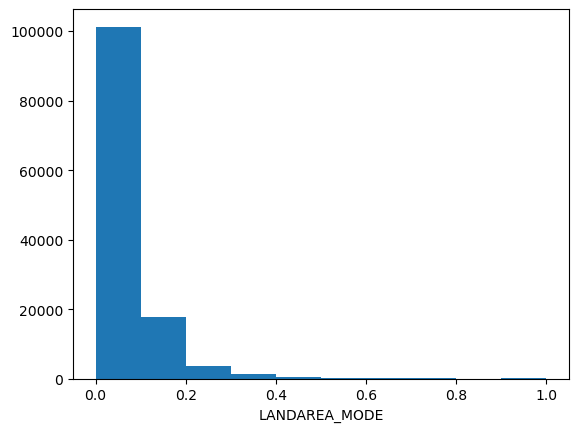

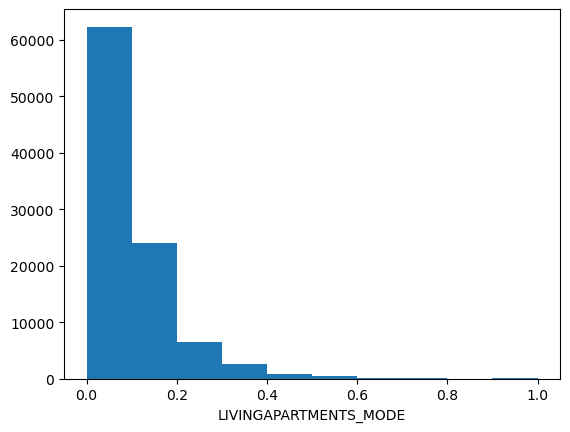

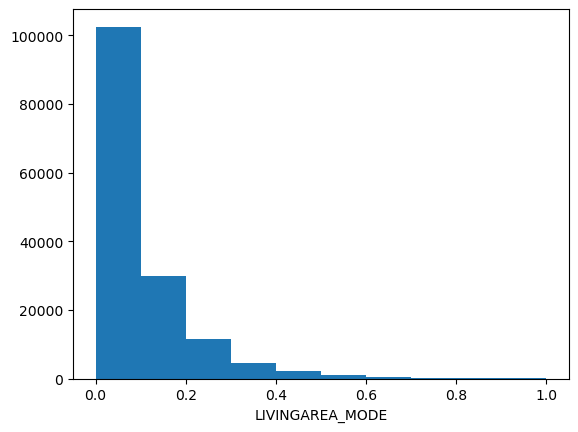

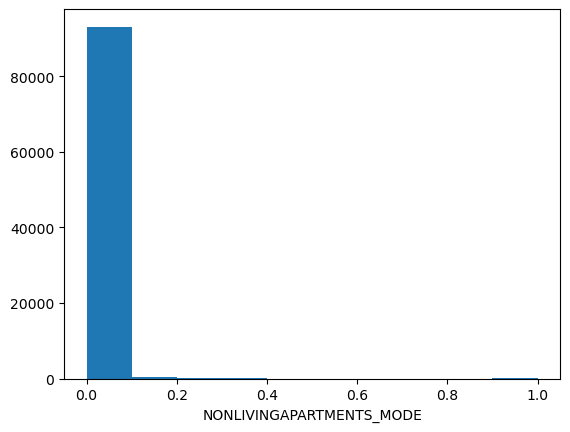

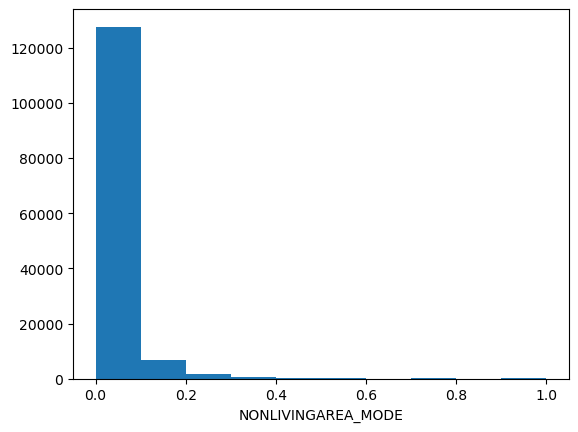

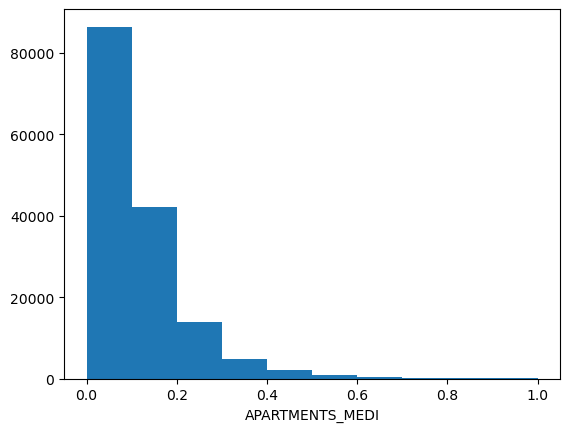

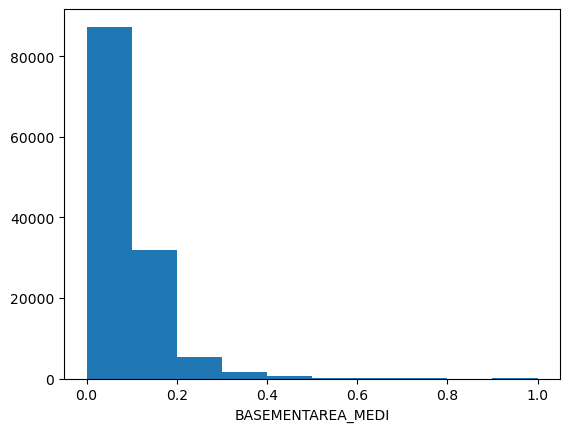

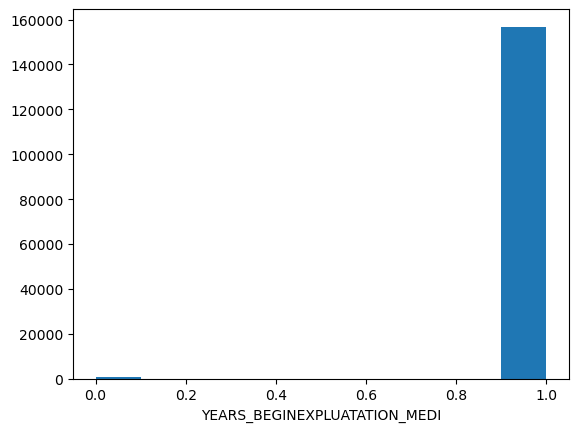

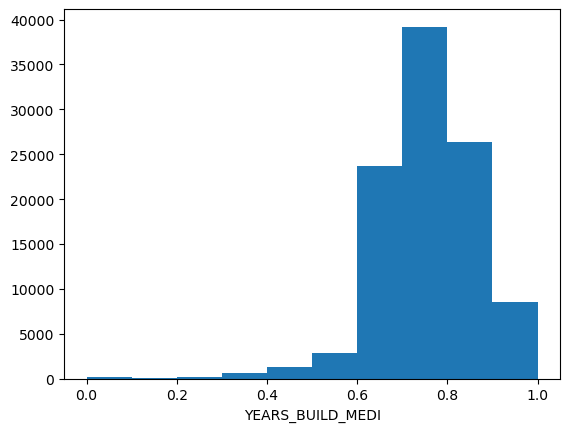

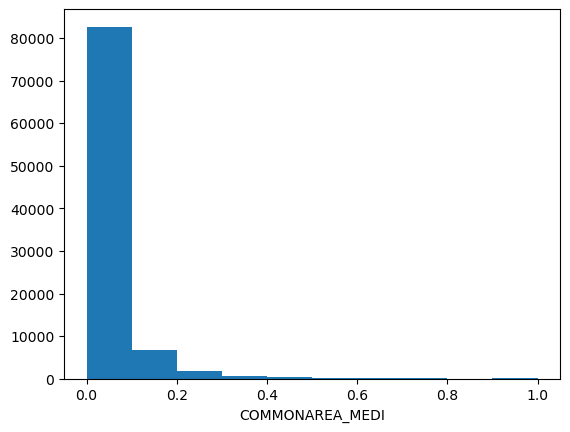

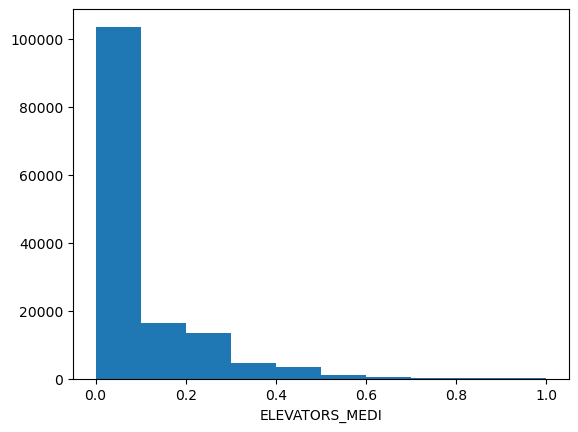

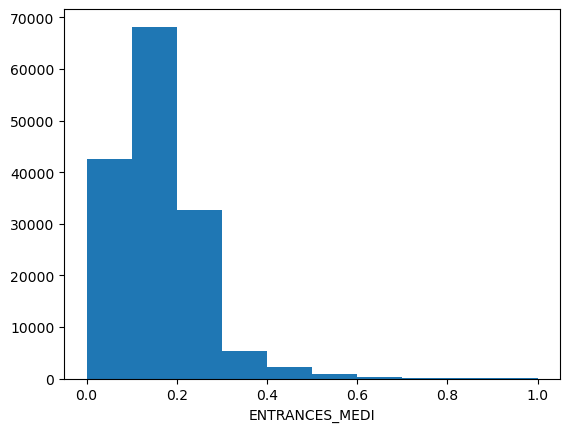

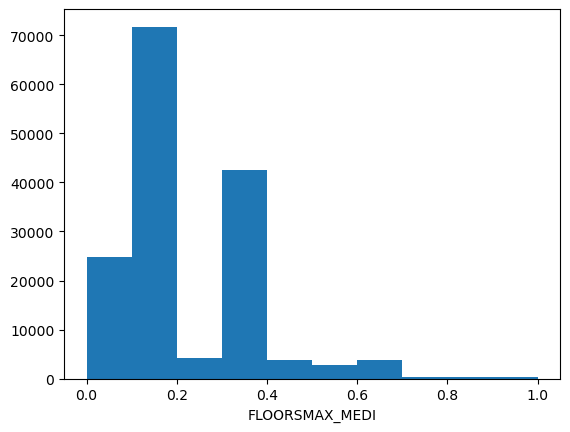

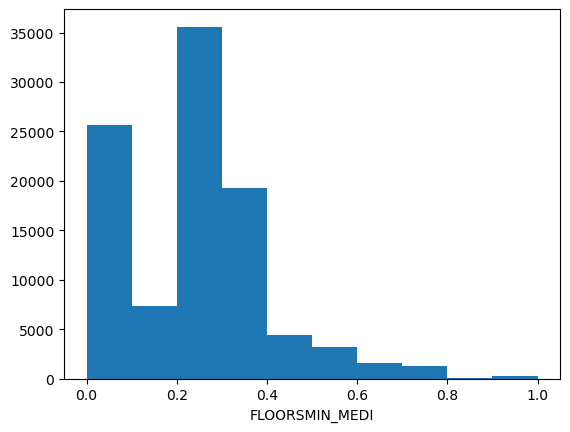

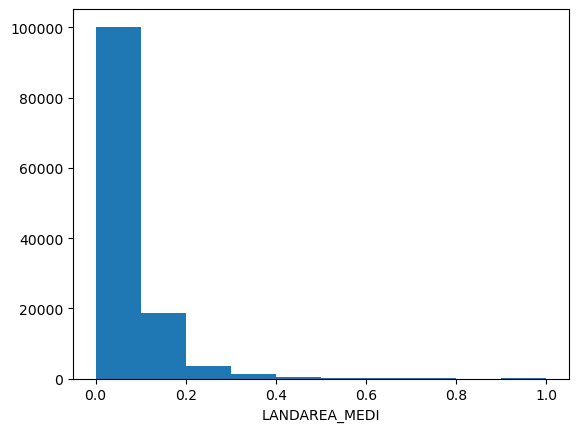

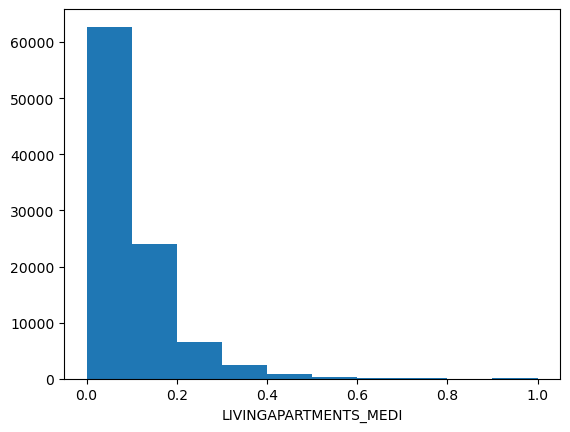

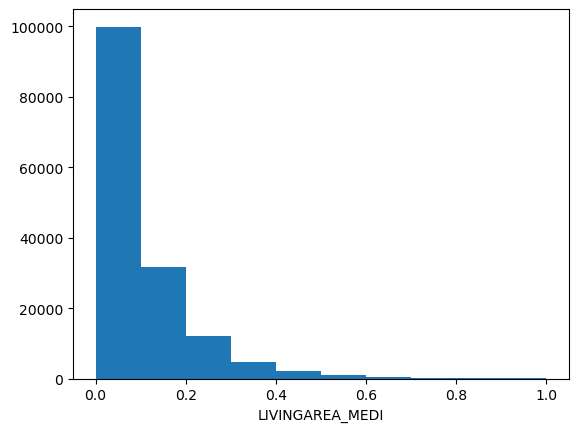

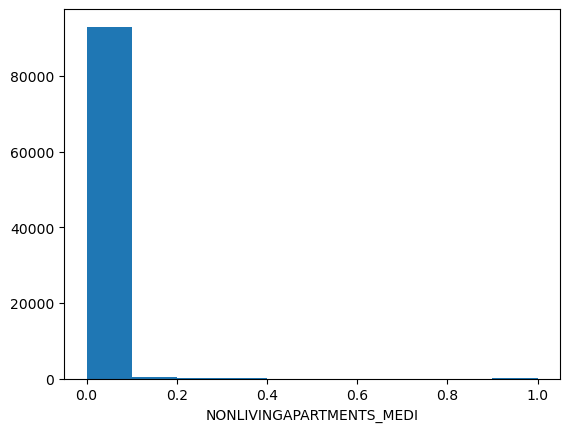

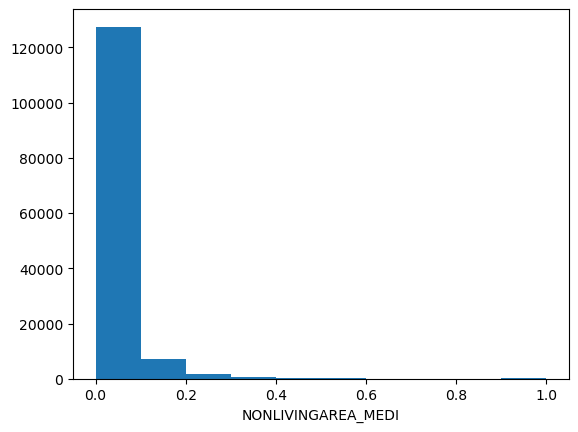

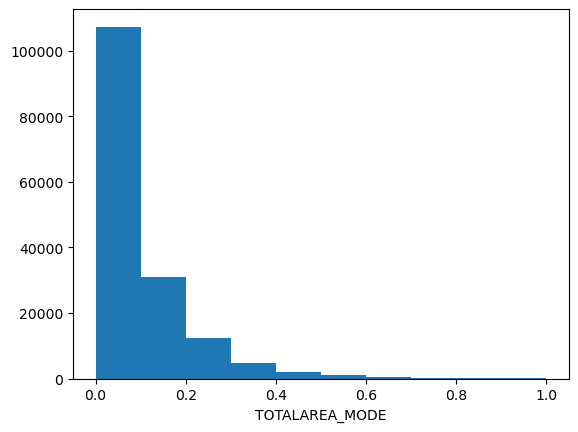

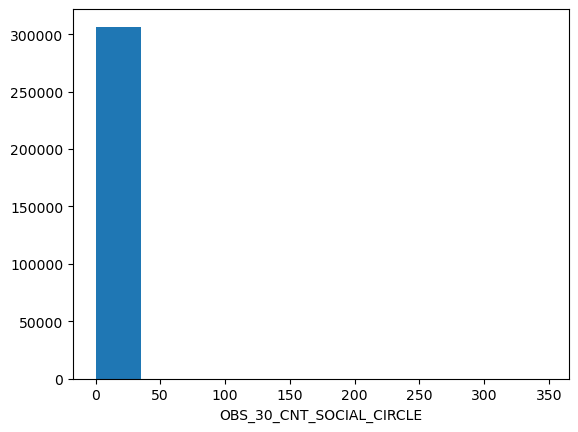

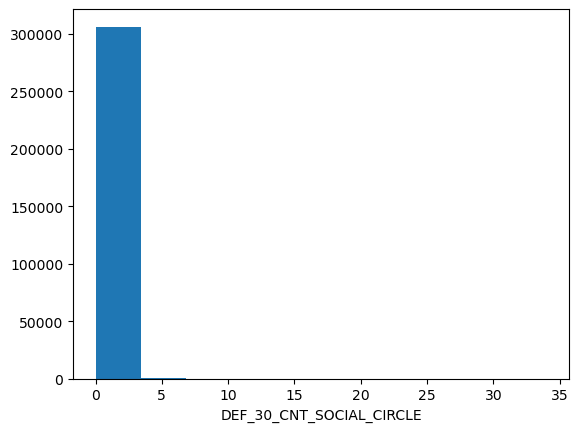

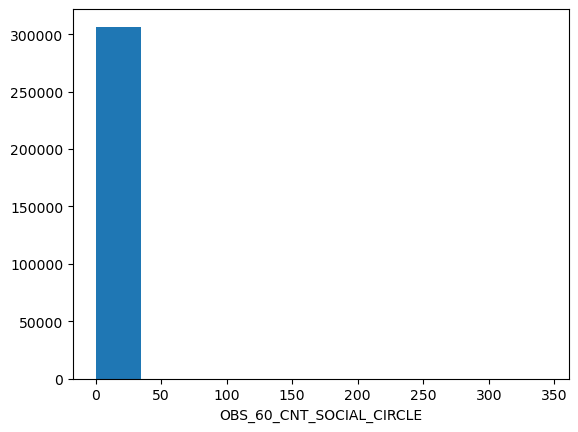

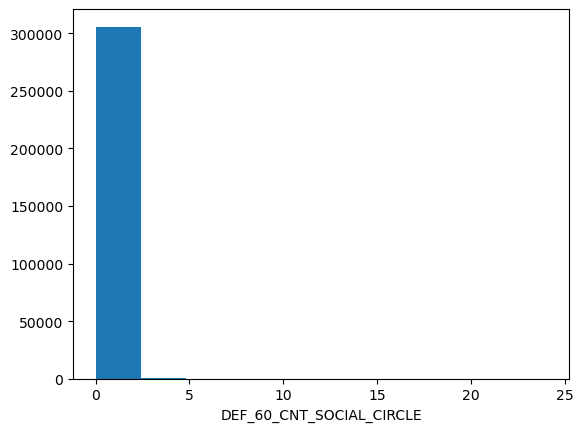

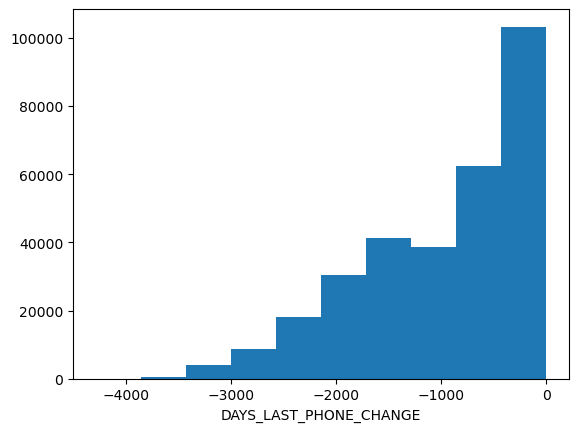

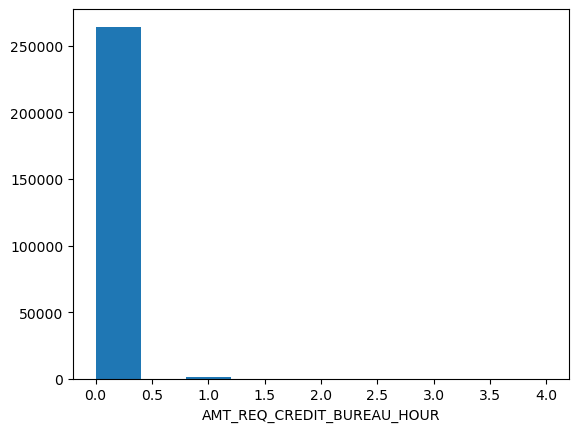

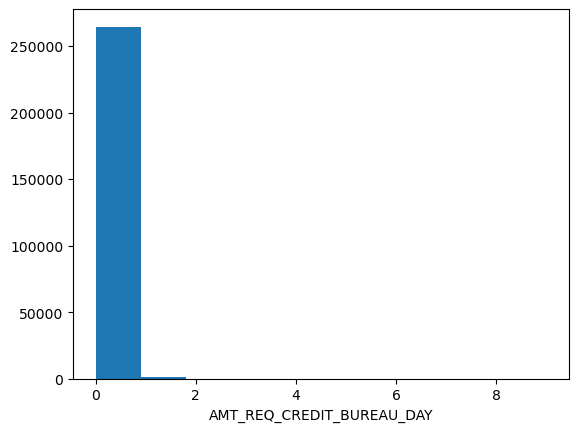

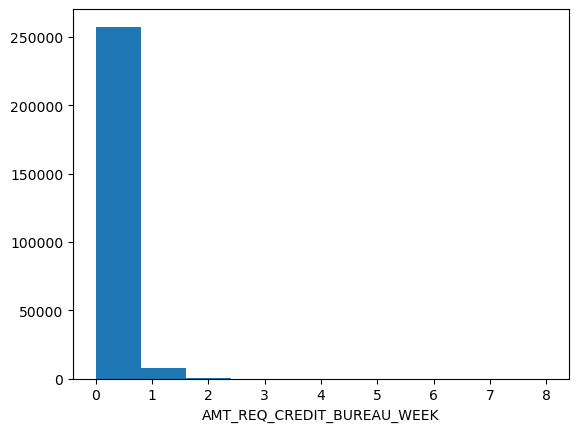

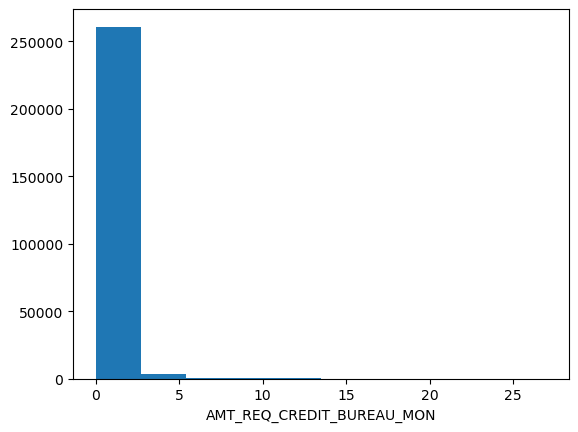

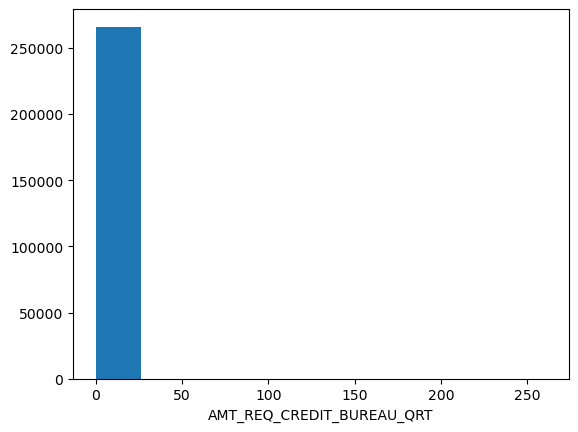

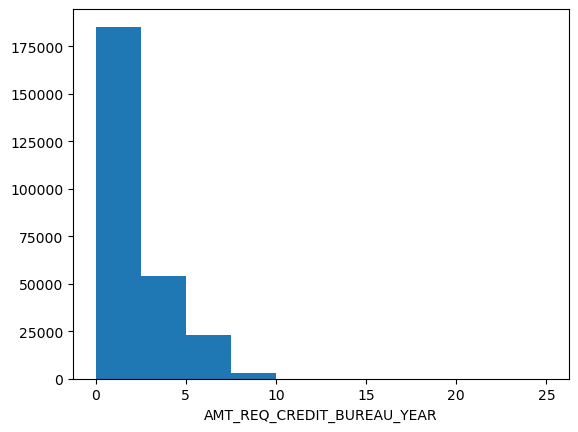

In [11]:
for i in df_credit.columns:
    unique_values = df_credit[i].unique()
    if i not in cat_var and len(unique_values) > 2:
        plt.hist(df_credit[i])
        plt.xlabel(i)
        plt.show()

In [12]:
for i in df_credit.columns:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [13]:
df_credit = df_credit.dropna()

In [15]:
df_credit

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,1,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,1,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
143,100165,0,0,0,1,1,0,175500.0,1293502.5,35568.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
152,100179,0,0,0,1,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,1,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307359,456084,0,0,0,1,1,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307363,456088,1,0,0,1,1,0,29250.0,663093.0,21519.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
307407,456140,1,0,0,1,1,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,0,0,1,1,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


# Hailey

In [16]:
X = df_credit.drop('TARGET', axis=1)  # Features
y = df_credit['TARGET']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Fit and transform on the training data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Reshape y_train and y_test to 2D arrays if they are 1D
y_train = y_train.values.reshape(-1, 1) if len(y_train.shape) == 1 else y_train
y_test = y_test.values.reshape(-1, 1) if len(y_test.shape) == 1 else y_test

# Fit and transform on the target data
y_train = imputer.fit_transform(y_train)
y_test = imputer.transform(y_test)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform on the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit and transform on the target data
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [18]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
coefficients = log_model.coef_
intercept = log_model.intercept_

In [41]:
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef}")

# Print the intercept
print(f"Intercept: {intercept}")

SK_ID_CURR: 0.04272060270590051
NAME_CONTRACT_TYPE: 0.09096908674205319
CODE_GENDER: 0.09381843030698464
FLAG_OWN_CAR: 0.0
FLAG_OWN_REALTY: 0.14658677683676732
CNT_CHILDREN: -0.1310460939804668
AMT_INCOME_TOTAL: -1.0810691375456065
AMT_CREDIT: 0.6791988598653921
AMT_ANNUITY: 0.6858157144681082
AMT_GOODS_PRICE: -0.6787350404506199
NAME_TYPE_SUITE: -0.16791896837325723
NAME_INCOME_TYPE: 0.18614745529763935
NAME_EDUCATION_TYPE: 0.40221237659468745
NAME_FAMILY_STATUS: -0.4201838483989268
NAME_HOUSING_TYPE: 0.19017356644913389
REGION_POPULATION_RELATIVE: 0.321333010803946
DAYS_BIRTH: -1.0150157160532258
DAYS_EMPLOYED: -0.02393442313527306
DAYS_REGISTRATION: 0.05314814047086432
DAYS_ID_PUBLISH: 0.2824414566024148
OWN_CAR_AGE: 0.14276725882498634
FLAG_MOBIL: 0.0
FLAG_EMP_PHONE: 0.23963912934577375
FLAG_WORK_PHONE: 0.07681599397350465
FLAG_CONT_MOBILE: 0.5142652146352825
FLAG_PHONE: -0.04676841116964735
FLAG_EMAIL: -0.03832139575539143
OCCUPATION_TYPE: 0.264620669949415
CNT_FAM_MEMBERS: -0.526

In [21]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients.flatten()})
feature_importance['AbsoluteCoefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='AbsoluteCoefficient', ascending=False)
feature_importance = feature_importance.reset_index()
feature_importance.head(30)

,index,Feature,Coefficient,AbsoluteCoefficient
0,42,EXT_SOURCE_3,-2.567650,2.567650
1,40,EXT_SOURCE_1,-2.052339,2.052339
2,41,EXT_SOURCE_2,-1.585159,1.585159
3,6,AMT_INCOME_TOTAL,-1.081091,1.081091
4,16,DAYS_BIRTH,-1.015016,1.015016
5,106,FLAG_DOCUMENT_13,-1.013204,1.013204
6,34,REG_REGION_NOT_WORK_REGION,-0.913934,0.913934
7,35,LIVE_REGION_NOT_WORK_REGION,0.881505,0.881505
8,86,HOUSETYPE_MODE,0.859302,0.859302
9,102,FLAG_DOCUMENT_9,0.828757,0.828757


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
probabilities = lda.predict_proba(x_test)
print(probabilities)